In [ ]:
#import needed libraries (pandas , numpy , seaborn, matplotlib , sklearn)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import datasets
import sklearn
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
!pip install -U scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# import iris dataset
iris =datasets.load_iris()
print(type(iris))

# use the numpy concatenate function
# data = np.concatenate((iris.data, np.array(iris.target_names[iris.target]).reshape(-1, 1),iris.target.reshape(-1, 1)), axis=1)
# iris_df = pd.DataFrame(data, columns=iris.feature_names + ['target names','target'])
# iris_df

<class 'sklearn.utils._bunch.Bunch'>


In [ ]:
iris_df = pd.DataFrame(data=np.concatenate((iris.data, np.array([iris.target]).T), axis=1),
                       columns=iris.feature_names + ['target'])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
# Show the dataset infromation
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [ ]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
#Describe the dataset
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


<Axes: xlabel='target', ylabel='count'>

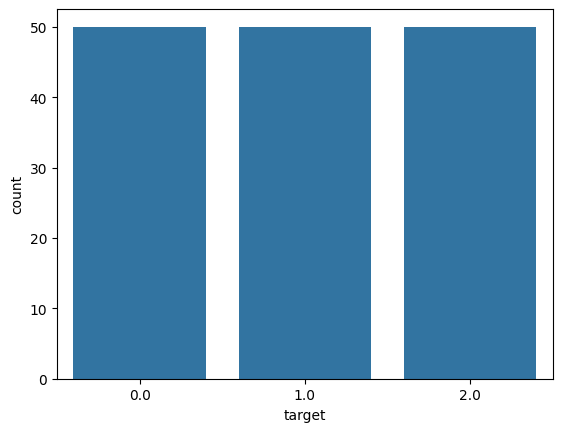

In [ ]:
#check the samples for each class / is it balanced dataset
iris_df['target'].value_counts()
sns.countplot(x='target', data=iris_df)

In [ ]:
#check for missing data
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [ ]:
#check duplicates why there is a duplicates in a ready datasets
iris_df.duplicated().sum()

1

In [ ]:
#drop duplicates
iris_df.drop_duplicates(inplace=True)
#test after remove the duplicates
iris_df.duplicated().sum()

0

## Split into X and Y

In [ ]:
##select all rows and all columns except the last one.
x = iris_df.iloc[:, :-1]

In [ ]:
##select all rows, but only the last column
y = iris_df.iloc[:, -1]

In [ ]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: target, Length: 149, dtype: float64

## Split into training and testing


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

# Convert to numpy arrays
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

In [ ]:
#check the traing set size and test set size:
print("training set size:", len(X_train),"samples")
print("test set size:", len(X_test),"samples")

training set size: 119 samples
test set size: 30 samples


## Normalize the dataset

In [ ]:
#the scaler is fitted to the training set / the Normalizer calculates the normalization parameters based on the training set.
scaler=sklearn.preprocessing.StandardScaler().fit(X_train)
#the scaler is applied to the training set / this step scales each feature in the training set independently.
normalized_X_train = scaler.transform(X_train)
##the scaler is applied to the test set
normalized_X_test = scaler.transform(X_test)

In [ ]:
print("X train before Normalization")
print(X_train[0:5])
print("\nX train after Normalization")
print(normalized_X_train[0:5])

X train before Normalization
[[6.  2.7 5.1 1.6]
 [6.7 3.1 4.7 1.5]
 [7.6 3.  6.6 2.1]
 [6.4 2.9 4.3 1.3]
 [4.4 3.2 1.3 0.2]]

X train after Normalization
[[ 0.1470438  -0.75561093  0.7189985   0.50982541]
 [ 0.96910747  0.18593567  0.48899629  0.37677887]
 [ 2.02604647 -0.04945098  1.58150677  1.17505813]
 [ 0.61679447 -0.28483763  0.25899408  0.11068578]
 [-1.73195887  0.42132232 -1.46602247 -1.3528262 ]]


Text(0.5, 1.08, 'Pair Plot of the dataset Before normalization')

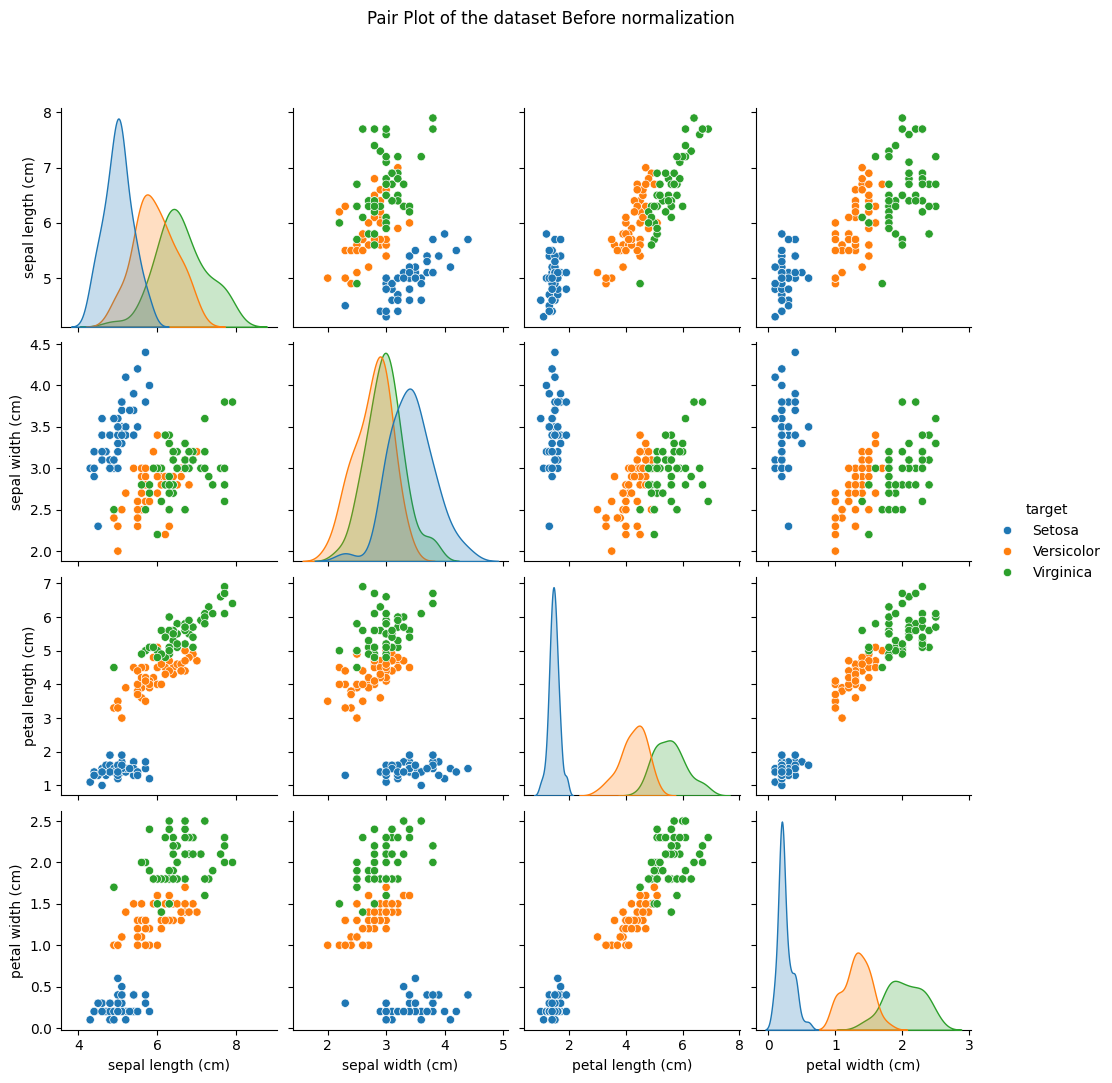

In [ ]:
## Before
# view the relationships between variables; color code by species type
di = {0.0: "Setosa", 1.0: "Versicolor", 2.0 : "Virginica"}

before = sns.pairplot(iris_df.replace({"target": di}), hue='target')
before.fig.suptitle("Pair Plot of the dataset Before normalization", y=1.08)




Text(0.5, 1.08, 'Pair Plot of the dataset After normalization')

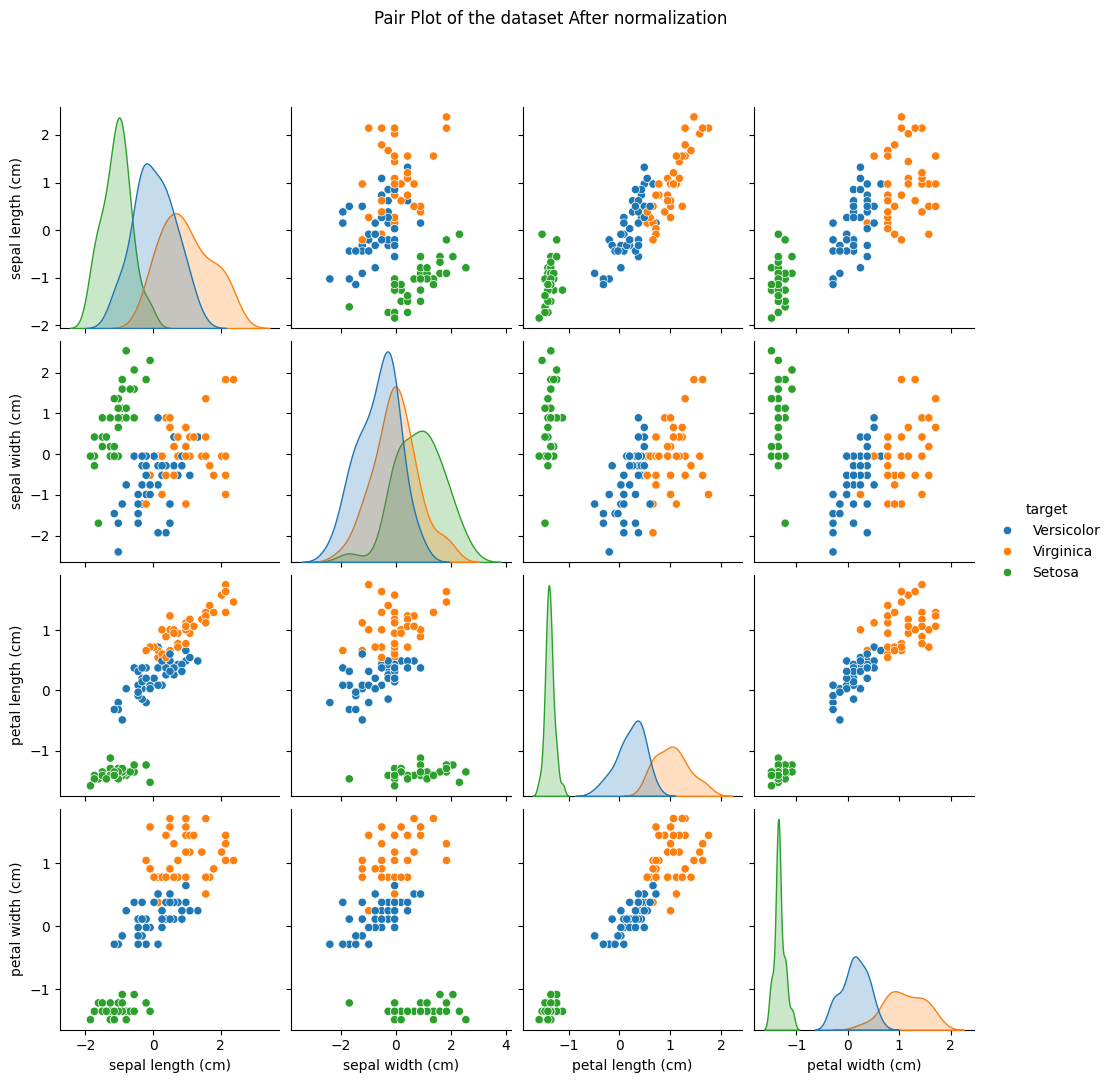

In [ ]:
## After
iris_df_2 = pd.DataFrame(data= np.c_[normalized_X_train, y_train],
                          columns = iris['feature_names'] + ['target'] )
di = {0.0: "Setosa", 1.0: "Versicolor", 2.0 : "Virginica"}
after = sns.pairplot(iris_df_2.replace({"target": di}), hue='target')
after.fig.suptitle("Pair Plot of the dataset After normalization", y=1.08)

In [ ]:
#check corroleation
print(iris_df.corr())

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.118129           0.873738   
sepal width (cm)           -0.118129          1.000000          -0.426028   
petal length (cm)           0.873738         -0.426028           1.000000   
petal width (cm)            0.820620         -0.362894           0.962772   
target                      0.786971         -0.422987           0.949402   

                   petal width (cm)    target  
sepal length (cm)          0.820620  0.786971  
sepal width (cm)          -0.362894 -0.422987  
petal length (cm)          0.962772  0.949402  
petal width (cm)           1.000000  0.956514  
target                     0.956514  1.000000  


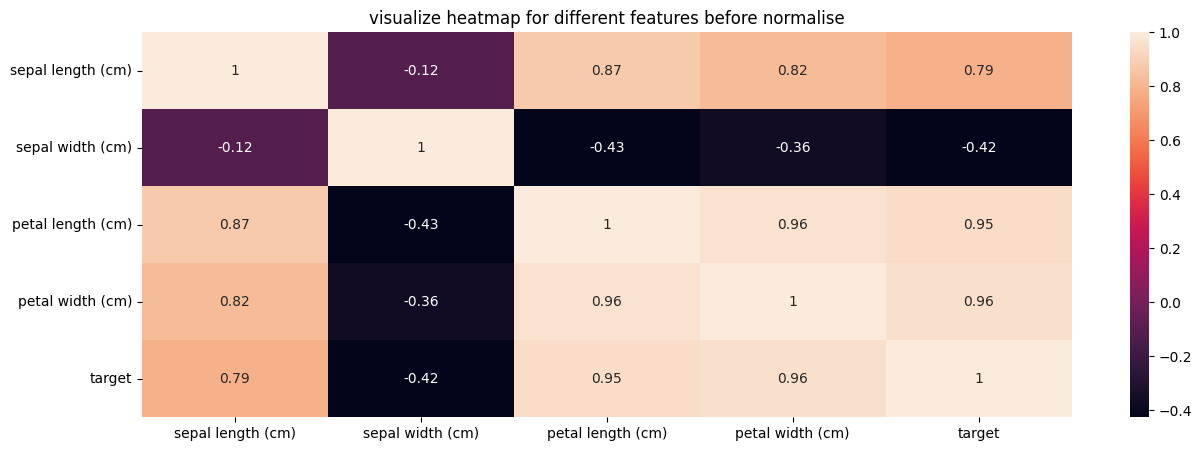

In [ ]:
#visualize heatmap for different features before normalise
fig, ax = plt.subplots(figsize=(15,5))
sns.heatmap(iris_df.corr(),annot=True)
plt.title("visualize heatmap for different features before normalise")
plt.show()

### Step 1 ( Calculate the distance using Eculidean distance)

In [ ]:
def distance_ecu(x_train, x_test_point):
    """
    Input:
        - x_train: corresponding to the training data
        - x_test_point: corresponding to the test point

    Output:
        - distances: The distances between the test point and each point in the training data.

    """
    distances = []

    # Loop over the rows of X train
    for i in range(len(x_train)):

        # Get the point by point
        current_train_point = x_train[i]

        # Initialize the distance to zero
        current_distance = 0

        # Loop over the columns of the row
        for j in range(len(current_train_point)):

            current_distance += (current_train_point[j] - x_test_point[j]) ** 2

        current_distance = np.sqrt(current_distance)

       ## Append the distances !
        distances.append(current_distance)

    # Store distances in a dataframe
    distances = pd.DataFrame(data=distances, columns=['index'])
    return distances


### Step 2 ( Find the nearest neighbors )

In [ ]:
def nearest_neighbors(distance_point, K):
    """
    Input:
        - distance_point: The distances between the test point and each point in the training data.
        - K              : The number of neighbors

    Output:
        - df_nearest: The nearest K neighbors between the test point and the training data

    """
    # Sort distances using the sort_values function
    df_nearest = distance_point.sort_values(by='index')

    # Take only the first K neighbors
    df_nearest = df_nearest.head(K)
    return df_nearest


### Step 3 ( Classify the point based on a majority vote )

In [ ]:
def voting(df_nearest, y_train):
    """
    Input:
        - df_nearest: DataFrame contains the nearest K neighbors between the full training dataset and the test point
        - y_train: The labels of the training dataset

    Output:
        - y_pred: The prediction based on Majority Voting

    """
    # Use the Counter Object to get the labels with K nearest neighbors
    counter_vote = Counter(y_train[df_nearest.index])

    ## Majority Voting !
    y_pred = counter_vote.most_common(1)[0][0]

    return y_pred


## KNN Full Algorithm : Putting Everything Together

In [ ]:
def KNN_from_scratch(x_train, y_train, x_test, K):


    """
    Input:
    - x_train: The full training dataset
    - y_train: The labels of the training dataset
    - x_test: The full test dataset
    - K: The number of neighbors

    Output:
    - y_pred: The prediction for the whole test set based on Majority Voting
    """
    y_pred = []

    # Loop over all the test set and perform the three steps
    for i in range(len(x_test)):
        # Step 1
        distance_point = distance_ecu(x_train, x_test[i])

        # Step 2
        df_nearest_point = nearest_neighbors(distance_point, K)

        # Step 3
        y_pred_point = voting(df_nearest_point, y_train)
        y_pred.append(y_pred_point)

    return y_pred


## Test the KNN Algorithm on the test dataset

In [ ]:
# Test at k = 3
K = 3
y_pred_scratch = KNN_from_scratch(X_train, y_train, X_test, K)

# Print the predictions
print(y_pred_scratch)

[2.0, 2.0, 2.0, 0.0, 1.0, 2.0, 2.0, 2.0, 0.0, 1.0, 2.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 2.0, 0.0, 2.0]


## Compare our implementation with the Sklearn library

In [ ]:
# knn=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_sklearn = knn.predict(X_test)
print(y_pred_sklearn)

[2. 2. 2. 0. 1. 2. 2. 2. 0. 1. 2. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 2. 0. 0. 2. 0. 2.]


In [ ]:
### Check if the output is exactly the same

print("The outputs are exactly the same." if np.array_equal(y_pred_sklearn, y_pred_scratch) else "The outputs are different.")


The outputs are exactly the same.


In [ ]:
# ### Calculate the accuracy of both methods
print(f'The accuracy of our implementation is {accuracy_score(y_test, y_pred_scratch)}')
print(f'The accuracy of scikit-learn implementation is {accuracy_score(y_test, y_pred_sklearn)}')

The accuracy of our implementation is 0.9
The accuracy of scikit-learn implementation is 0.9


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_sklearn = knn.predict(X_test)
print(y_pred_sklearn)

[2. 2. 2. 0. 1. 2. 2. 2. 0. 1. 2. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 2. 0. 0. 2. 0. 2.]


In [ ]:
print("The outputs are exactly the same." if np.array_equal(y_pred_sklearn, y_pred_scratch) else "The outputs are different.")


The outputs are exactly the same.


In [ ]:
# ### Calculate the accuracy of both methods
print(f'The accuracy of our implementation is {accuracy_score(y_test, y_pred_scratch)}')
print(f'The accuracy of scikit-learn implementation is {accuracy_score(y_test, y_pred_sklearn)}')

The accuracy of our implementation is 0.9
The accuracy of scikit-learn implementation is 0.9


In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred_sklearn = knn.predict(X_test)
print(y_pred_sklearn)

[2. 2. 2. 0. 1. 2. 2. 2. 0. 1. 2. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 2. 0. 0. 2. 0. 2.]


In [ ]:
# ### Calculate the accuracy of both methods
print(f'The accuracy of our implementation is {accuracy_score(y_test, y_pred_scratch)}')
print(f'The accuracy of scikit-learn implementation is {accuracy_score(y_test, y_pred_sklearn)}')

The accuracy of our implementation is 0.9
The accuracy of scikit-learn implementation is 0.9
